In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath("..")) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from models import kane_mele
from pythtb import *
from wanpy import *

# Topological model primitive cell

In [3]:
onsite = 1.0  # 1.0 for top, 2.5 for triv
t = 1
soc = 0.6*t*0.5
rashba = 0.25*t

n_supercell = 2
km_model = kane_mele(onsite, t, soc, rashba).make_supercell([[n_supercell, 0], [0, n_supercell]])

n_orb = km_model.get_num_orbitals()
n_occ = int(n_orb/2)*2
low_E_sites = list(np.arange(0, n_orb, 2))
high_E_sites = list(np.arange(1, n_orb, 2))

In [4]:
# Haldane tight-binding parameters
onsite = 1.0  # 1.0 for top, 2.5 for triv
t = 1
soc = 0.6*t*0.5
rashba = 0.25*t

n_supercell = 1
prim_model = kane_mele(onsite, t, soc, rashba).make_supercell([[n_supercell, 0], [0, n_supercell]])

lat_vecs = prim_model.get_lat()
orb_vecs = prim_model.get_orb()
n_orb = prim_model.get_num_orbitals()
n_occ = int(n_orb/2)*2
low_E_sites = list(np.arange(0, n_orb, 2))
high_E_sites = list(np.arange(1, n_orb, 2))

tf_sites = low_E_sites
tf_list = [ [(orb, spin, 1) ] for orb in tf_sites for spin in [0,1] ]
n_tfs = len(tf_list)
Wan_frac = n_tfs/n_occ

WF_prim = Wannier(prim_model, [20, 20])
WF_prim.set_trial_wfs(tf_list)

# Setting save directory
model_name = "kane_mele"
model_str = f't={t}_soc={soc}_onsite={onsite}_n_occ={n_occ}'
sv_dir = 'data'
sv_prefix = f'{model_name}_sing_vals'
sv_sfx = model_str + f'_tfx={np.array(tf_sites, dtype=int)}'
file_name = f"{sv_dir}/{sv_prefix}_{sv_sfx}"

print(f"Low energy sites: {low_E_sites}")
print(f"High energy sites: {high_E_sites}")
print(f"Trial wfs: {tf_sites}")
print(f"# of Wannier functions: {n_tfs}")
print(f"# of occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")
print(file_name)

k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]]
label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$')
nk = 201
(k_vec, k_dist, k_node) = prim_model.k_path(k_path, nk, report=False)

eigvals_path, u_wfs_path = prim_model.solve_ham(k_vec, return_eigvecs=True)
state_idx = list(range(n_occ))
A_k_prim = WF_prim.get_tf_ovlp_mat(state_idx, psi_wfs=u_wfs_path)
_, S_k_prim, _ = np.linalg.svd(A_k_prim, full_matrices=False)

Low energy sites: [np.int64(0)]
High energy sites: [np.int64(1)]
Trial wfs: [np.int64(0)]
# of Wannier functions: 2
# of occupied bands: 2
Wannier fraction: 1.0
data/kane_mele_sing_vals_t=1_soc=0.3_onsite=1.0_n_occ=2_tfx=[0]


# Topological supercell

In [5]:
# Setting and solving model
onsite = 1.0  # 1.0 for top, 2.5 for triv
t = 1
soc = 0.6*t*0.5
rashba = 0.25*t

n_super_cell = 2
model_top_sc = kane_mele(onsite, t, soc, rashba).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

lat_vecs = model_top_sc.get_lat()
orb_vecs = model_top_sc.get_orb()
n_orb = model_top_sc.get_num_orbitals()
n_occ = int(n_orb/2)*2
low_E_sites = list(np.arange(0, n_orb, 2))
high_E_sites = list(np.arange(1, n_orb, 2))

# setting Wannier functions and trial wavefunctions
tf_sites = low_E_sites
tf_list = [ [(orb, spin, 1) ] for orb in tf_sites for spin in [0,1] ]
n_tfs = len(tf_list)
Wan_frac = n_tfs/n_occ

# Setting save directory
model_name = "kane_mele"
model_str = f't={t}_soc={soc}_onsite={onsite}_n_occ={n_occ}'
sv_dir = 'data'
sv_prefix = f'{model_name}_sing_vals'
sv_sfx = model_str + f'_tfx={np.array(tf_sites, dtype=int)}'
file_name = f"{sv_dir}/{sv_prefix}_{sv_sfx}"

print(f"Low energy sites: {low_E_sites}")
print(f"High energy sites: {high_E_sites}")
print(f"Trial wfs: {tf_sites}")
print(f"# of Wannier functions: {n_tfs}")
print(f"# of occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")
print(file_name)

WF_top_sc = Wannier(model_top_sc, [20, 20])
WF_top_sc.set_trial_wfs(tf_list)

# Computing S_k 
k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]]
label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$')
nk = 201
(k_vec, k_dist, k_node) = model_top_sc.k_path(k_path, nk, report=False)

eigvals_path, u_wfs_path = model_top_sc.solve_ham(k_vec, return_eigvecs=True)
state_idx = list(range(n_occ))
A_k_top_sc = WF_top_sc.get_tf_ovlp_mat(state_idx, psi_wfs=u_wfs_path)
_, S_k_top_sc, _ = np.linalg.svd(A_k_top_sc, full_matrices=False)

Low energy sites: [np.int64(0), np.int64(2), np.int64(4), np.int64(6)]
High energy sites: [np.int64(1), np.int64(3), np.int64(5), np.int64(7)]
Trial wfs: [np.int64(0), np.int64(2), np.int64(4), np.int64(6)]
# of Wannier functions: 8
# of occupied bands: 8
Wannier fraction: 1.0
data/kane_mele_sing_vals_t=1_soc=0.3_onsite=1.0_n_occ=8_tfx=[0 2 4 6]


# Reduced WFs singular values

In [6]:
# setting Wannier functions and trial wavefunctions
omit_sites = 6
tf_sites  = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site
tf_list = [ [(orb, spin, 1) ] for orb in tf_sites for spin in [0,1] ]
n_tfs = len(tf_list)
Wan_frac = n_tfs/n_occ

WF_red = Wannier(model_top_sc, [20, 20])
WF_red.set_trial_wfs(tf_list)

# Setting save directory
model_name = "kane_mele"
model_str = f't={t}_soc={soc}_onsite={onsite}_n_occ={n_occ}'
sv_dir = 'data'
sv_prefix = f'{model_name}_sing_vals'
sv_sfx = model_str + f'_tfx={np.array(tf_sites, dtype=int)}'
file_name = f"{sv_dir}/{sv_prefix}_{sv_sfx}"

print(f"Low energy sites: {low_E_sites}")
print(f"High energy sites: {high_E_sites}")
print(f"Trial wfs: {tf_sites}")
print(f"# of Wannier functions: {n_tfs}")
print(f"# of occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")
print(file_name)

# Computing S_k 
eigvals_path, u_wfs_path = model_top_sc.solve_ham(k_vec, return_eigvecs=True)
state_idx = list(range(n_occ))
A_k_red = WF_red.get_tf_ovlp_mat(state_idx, psi_wfs=u_wfs_path)
_, S_k_red, _ = np.linalg.svd(A_k_red, full_matrices=False)

Low energy sites: [np.int64(0), np.int64(2), np.int64(4), np.int64(6)]
High energy sites: [np.int64(1), np.int64(3), np.int64(5), np.int64(7)]
Trial wfs: [np.int64(0), np.int64(2), np.int64(4)]
# of Wannier functions: 6
# of occupied bands: 8
Wannier fraction: 0.75
data/kane_mele_sing_vals_t=1_soc=0.3_onsite=1.0_n_occ=8_tfx=[0 2 4]


# Figure

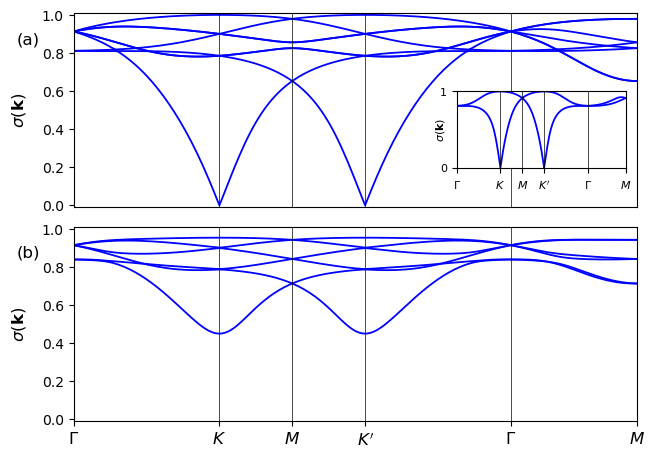

In [7]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'hspace':0.1}, sharex=True)

#### Supercell topological #####
for n in range(S_k_top_sc.shape[-1]):
  ax[0].plot(k_dist, S_k_top_sc[:, n], c='b', lw=1.3)

# add vertical lines at node positions
for n in range(len(k_node)):
  ax[0].axvline(x=k_node[n], linewidth=0.5, color='k')

ax[0].set_xlim(k_node[0], k_node[-1])
ax[0].set_ylim(-0.01, 1.01)
# ax[0].set_xticks(k_node)
# ax[0].set_xticklabels(label)
ax[0].xaxis.set_ticks_position('none') 
ax[0].set_ylabel(r"$\sigma(\mathbf{k})$", size=12)
ax[0].yaxis.labelpad = 10
ax[0].text(-.13, 0.85, '(a)', size=12)

#### Primitve cell singular vals ####
inset_ax = ax[0].inset_axes([0.68, 0.2, 0.3, 0.4])  # [x0, y0, widthx, widthy]
for n in range(S_k_prim.shape[-1]):
  inset_ax.plot(k_dist, S_k_prim[:, n], c='b', lw=1.3)

# add vertical lines at node positions
for n in range(len(k_node)):
  inset_ax.axvline(x=k_node[n], linewidth=0.5, color='k')

inset_ax.set_xlim(k_node[0], k_node[-1])
inset_ax.set_ylim(-0.01, 1.01)
inset_ax.set_xticks(k_node)
inset_ax.tick_params(axis='y', labelsize=8)
inset_ax.set_yticks([0,1])
inset_ax.set_xticklabels(label, size=8)
# ax.xaxis.set_ticks_position('none') 
inset_ax.set_ylabel(r"$\sigma(\mathbf{k})$", size=8)
inset_ax.yaxis.labelpad = -5
# inset_ax.axis('equal')
# inset_ax.set_xticks([])
# inset_ax.set_yticks([])
# inset_ax.set_axis_off()

#### Reduced Wannier functions ####
for n in range(S_k_red.shape[-1]):
  ax[1].plot(k_dist, S_k_red[:, n], c='b', lw=1.3)

# add vertical lines at node positions
for n in range(len(k_node)):
  ax[1].axvline(x=k_node[n], linewidth=0.5, color='k')

ax[1].set_xlim(k_node[0], k_node[-1])
ax[1].set_ylim(-0.01, 1.01)
ax[1].set_xticks(k_node)
ax[1].set_xticklabels(label, size=12)
ax[1].set_ylabel(r"$\sigma(\mathbf{k})$", size=12)
ax[1].yaxis.labelpad = 10
ax[1].text(-.13, 0.85, '(b)', size=12)

plt.subplots_adjust(top=0.95, left=0.1, bottom=0.1, right=0.98)

model_name = "kane_mele"
sv_dir = 'figures'
sv_prefix = f'fig11_{model_name}_sing_vals'
file_name = f"{sv_dir}/{sv_prefix}_comparison"
plt.savefig(f'{file_name}.png', dpi=700)